# Your Business case
As a data specialist working for salifort Motors, you have recieved the results of a recent employee survey. The senior leadership team has asked you with analyzing the data to comeup with ideas for how to increase employee retention.
to help with this, they would like you to design a model that predict "Whether the employee will leave the company based on thier department, number of projects, average monthly hours, and any others data point you  deem helpful.

# About the company
Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. its global workforce of over 100000 employees research, design, construct, validate, and distribute electric, solor, algea,and hydrogen-based Vahicales.
Salifort's end-to-end vertical integeration madel has made it global leader at the intersection of alternative energy and automobiles.

# The value of your deliverable
For this deliverable, you are asked to choose method to approach this data challenge based on your prior course work. Select either regression model or a tree based machine learning model to predict whether an employee will leave the company. both are shown in the project exemplar, but only one is needed to complete your project.



# Scenario
Review the scenario below. Then complete the step-by-step instructions.

You are a data professional working for Salifort Motors. 

Currently, there is a high rate of turnover among Salifort employees. (Note: In this context, turnover data includes both employees who choose to quit their job and employees who are let go). Salifort’s senior leadership team is concerned about how many employees are leaving the company. Salifort strives to create a corporate culture that supports employee success and professional development. Further, the high turnover rate is costly in the financial sense. Salifort makes a big investment in recruiting, training, and upskilling its employees. 

If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solution. 

As a first step, the leadership team asks Human Resources to survey a sample of employees to learn more about what might be driving turnover.  

Next, the leadership team asks you to analyze the survey data and come up with ideas for how to increase employee retention. To help with this, they suggest you design a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees. 

As a specialist in data analysis, the leadership team leaves it up to you to choose an approach for building the most effective model to predict employee departure. For example, you could build and evaluate a statistical model such as logistic regression. Or, you could build and evaluate machine learning models such as decision tree, random forest, and XGBoost. Or, you could choose to deploy both statistical and machine learning models. 

For any approach, you’ll need to analyze the key factors driving employee turnover, build an effective model, and share recommendations for next steps with the leadership team. 

In [1]:
# Packages for data manipulation and data processing
import numpy as np
import pandas as pd
from scipy import stats

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load the dataset
df= pd.read_csv("D:\Capston project\HR_capstone_dataset.csv")
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data Dictionary
satisfaction_level: (The employee’s self-reported satisfaction level [0-1])

last_evaluation: (Score of employee's last performance review [0–1])

number_project: (Number of projects employee contributes to)

average_monthly_hours: (Average number of hours employee worked per month)

time_spend_company: (How long the employee has been with the company (years))

work_accident: (Whether or not the employee experienced an accident while at work)

left: (Whether or not the employee left the company)

promotion_last_5years: (Whether or not the employee was promoted in the last 5 years)

department: (The employee's department)

salary: (The employee's salary (low, medium, or high))

# Step 2. Data Exploration (Initial EDA and data cleaning)
Understand your variables

Clean your dataset (missing data, redundant data, outliers

In [3]:
#get the first few rows of the dataset
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
# Display information about the dataset (data types, non-null counts, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Generate summary statistics for numerical columns
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# Describe the object data
df.describe(include='object')

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [7]:
#display all the columns
for i in df.columns:
    print(i)

satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
left
promotion_last_5years
Department
salary


# Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in snake_case, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
df.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace= True)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
for i in df.columns:
    print(i)

satisfaction_level
last_evaluation
number_project
average_monthly_hours
time_spend_company
Work_accident
left
promotion_last_5years
Department
salary


# Missing values

In [10]:
# Check for missing values in each column
miss_values= df.isnull().sum()
miss_values

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# Duplicates
Checking for duplicates row is a critical data cleanning step that contributes to the reliability, accuracy, and interpretability of analysis models. it helps uncover genuine insight while mitigating the risk of baised or misleading results.
1. Data Quality Assurance
2. Avoiding bais in analysis
3. Efficient Resource utilization
4. Enhancing Data Interpretation
5. Improving Model Performance
6. Ensuring Data Consistency 

In [11]:
# Check for duplicate rows in the dataset
dups= df[df.duplicated()]
# Display the duplicate rows
dups

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable
df1= df.drop_duplicates()
df1.shape

(11991, 10)

In [13]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Summary
The count of rows has decreased from 14,999 to 11,991.

The means of some columns (e.g., satisfaction_level, Work_accident) have slightly changed, indicating differences in the data distribution after removing duplicates.

Removing duplicates has affected the size of the dataset and slightly altered the distribution of some columns, but the basic statistics remain comparable before and after the operation.

# handling Outliers

In [14]:
df1['time_spend_company'].value_counts()

time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

<Axes: xlabel='Time Spend in Comapny (yr)', ylabel='Count'>

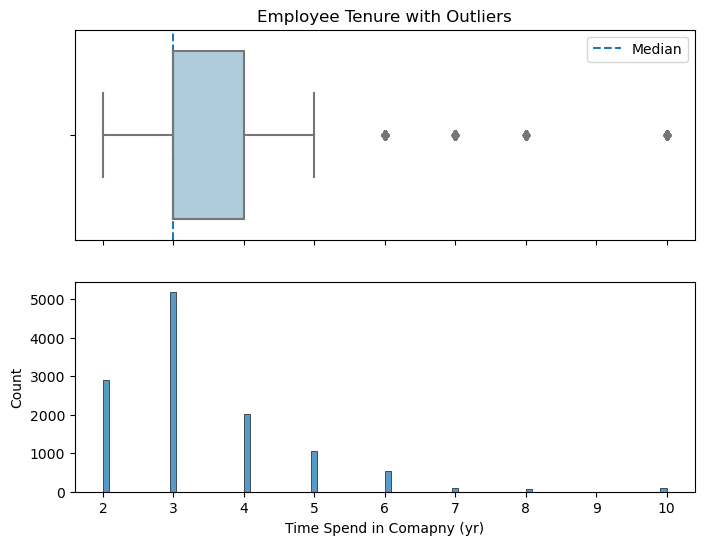

In [15]:
# Create a boxplot to visualize the distribution of employee 'time_spend_company'  and detect outliers
pal = sns.color_palette('Paired',4)
fig, (a0, a1) = plt.subplots(figsize=(8,6),nrows=2,sharex=True)
sns.boxplot(x='time_spend_company',data=df1,ax=a0,color=pal[0])
a0.axvline(x=df1.time_spend_company.median(),label='Median',ls='--')
a0.legend()
a0.set_xlabel("")
a1.set_xlabel("Time Spend in Comapny (yr)")
a0.set_title("Employee Tenure with Outliers")

sns.histplot(x='time_spend_company',data=df1, ax=a1, color=pal[1],bins='fd')

In [16]:
# Define a function to detect outliers using IQR method for a specific column
def detect_outliers_iqr(df, column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_bounds = Q1 - 1.5 * IQR
    upper_bounds = Q3 + 1.5 * IQR
    Outliers= df[(df[column] < lower_bounds) | (df[column]> upper_bounds)]
    return Outliers

# Detect outliers using the function for df1 DataFrame
Outliers_df1= detect_outliers_iqr(df1, 'time_spend_company')

print("Outliers detected using IQR method for column 'time_spend_company'")
Outliers_df1



Outliers detected using IQR method for column 'time_spend_company'


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


# Check Outliers without function


In [17]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df1['time_spend_company'].quantile(0.25)
Q3 = df1['time_spend_company'].quantile(0.75)
print("Percentile25:",Q1)
print("Percentile75:",Q3)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1
print("The interquartile range (IQR):", IQR)


# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower_bound:", lower_bound)
print("Upper_bound:",upper_bound)

# Detect outliers
without_outliers_df = df1[np.logical_and(df1['time_spend_company'] >= lower_bound , df1['time_spend_company'] <= upper_bound)]


Percentile25: 3.0
Percentile75: 4.0
The interquartile range (IQR): 1.0
Lower_bound: 1.5
Upper_bound: 5.5



Certain types of models, such as linear regression and k-means clustering, are more sensitive to outliers than others. When building your model, it's important to consider whether to remove outliers based on the characteristics of the model you choose to use.

**What did you observe about the relationships between variables?**

**Ans:**
We have a dataset with information on 10 departments and 3 salary levels. Fortunately, there were no missing values in our dataset. However, we encountered some data quality issues:\
We found over 3000 duplicate rows, which may skew our analysis if not addressed.
Additionally, there were nearly 800 outlier values in the employee tenure column, which could adversely affect the performance of certain models.
To address these issues, we created a new dataframe for employee tenure, excluding the outliers.

**What do you observe about the distributions in the data?**

**Ans:**
Thus far, our observations have mainly focused on the distribution of employee tenure, which appears to be discrete. We can model this distribution using a Poisson distribution. Additionally, we've identified employees with a tenure of over 5 years as potential outliers in our analysis.

**What transformations did you make with your data and Why did you chose to make those decisions?**

**Ans:**
Up to this point, the only transformation we've implemented is the removal of outliers from the employee tenure column. This step was taken because certain models, such as decision trees, can be highly sensitive to outlier data, potentially affecting the model's performance and accuracy.

**What are some purposes of EDA before constructing a predictive model?**

**Ans:**
Performing Exploratory Data Analysis (EDA) serves several purposes in our analysis process. One of the main objectives is to identify and address any problematic biases present in the data, ensuring that the quality of the data meets the minimum requirements for our model. Additionally, EDA helps us gain a deeper understanding of the underlying distributions and correlations between variables in our dataset, which is crucial for building accurate and reliable predictive models. By thoroughly exploring and analyzing the data through EDA, we can make informed decisions and develop robust models that effectively capture the patterns and relationships within the data.

**What resources do you find yourself using as you complete this stage**?

**Ans:**
Up to this point, my primary resources for managing various aspects of Exploratory Data Analysis (EDA) have been notebooks from previous courses and reference guides. These resources have been instrumental in refreshing my memory and providing guidance on how to effectively conduct EDA, ensuring that I follow best practices and methodologies in my analysis.

**Do you have any ethical considerations in this stage?**

**Ans:**
At this juncture, we need to acknowledge some ethical considerations in our analysis. By excluding employees who have been with the company for over 5 years, we risk overlooking potentially valuable personnel. It's important to ensure that our data exclusion criteria are justified and do not inadvertently discriminate against certain groups of employees. We should carefully evaluate the impact of this exclusion on our analysis and consider alternative approaches to mitigate any potential biases. Additionally, transparency and fairness in our data handling practices are essential to maintaining trust and integrity in our analysis.

# Step-2: Analyze Stage


Perform EDA (analyze relationships between variables)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

Number of employee who left:1991(16.60%)
Number of employee who stayed:10000(83.40%)


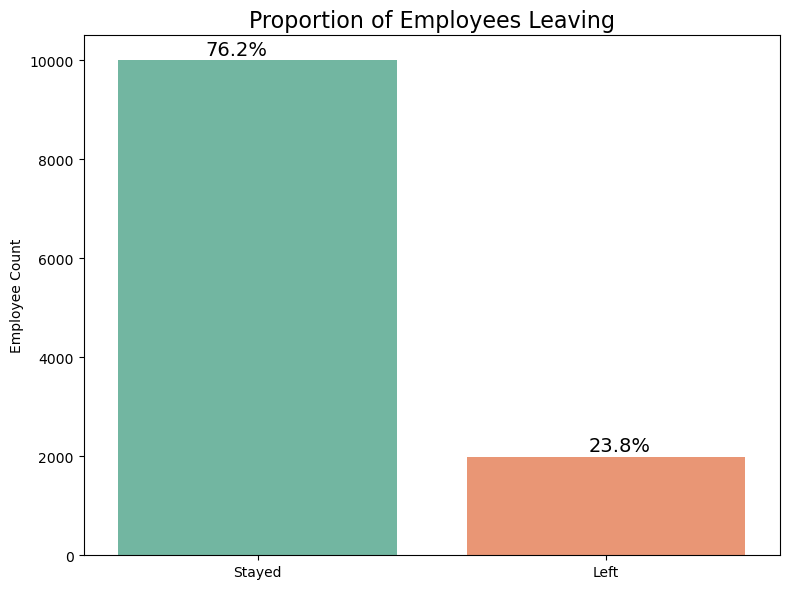

In [18]:
# Calculate the number of employees who left vs stayed
stayed_count, left_count= df1['left'].value_counts()

# Calculate the percentage of employees
percentage_left= (left_count/len(df1)*100)
percentage_stayed= (stayed_count/len(df1)*100)

#display the result
print(f"Number of employee who left:{left_count}({percentage_left:.2f}%)") 
print(f"Number of employee who stayed:{stayed_count}({percentage_stayed:.2f}%)")

# Visualize this ratio
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='left',data=df1,palette='Set2',ax=ax)
ax.text(x=-0.15,y=10100,s='76.2%',fontsize=14)
ax.text(x=0.95,y=2100,s='23.8%',fontsize=14)
ax.set_xticklabels(['Stayed','Left'])
ax.set_xlabel("")
ax.set_ylabel("Employee Count")
ax.set_title('Proportion of Employees Leaving',fontsize=16)
plt.tight_layout()
plt.savefig('Left_Proportion.png')

# Understand numbers of good employee who left .
Analyzing the reasons why high-performance employees leave can help identify factors such as dissatisfaction, lack of career growth opportunities, or issues with workplace culture that may need to be addressed.

This information can be instrumental in implementing retention stategies aimed at retaining top talen and improveing overall employee satisfaction and engagement.

Number of high performers: 5740
percentage of high performers: 47.869235259778165
Number of High performance workers who left: 1742
percentage of High performance workers who left: 30.34843205574913


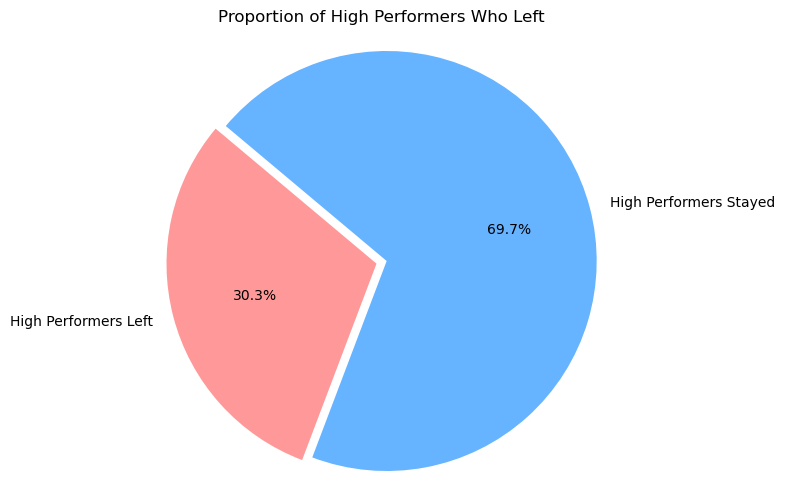

In [19]:
# We can say, "last_evaluation" is indicator of good employees.

#Define the threshold for high performers
threshold_last_eva = 0.80

#Identify high performers based on the threshold
High_performers = df[df['last_evaluation'] >= threshold_last_eva]

# Calculate the number of high performers
num_high_performance= len(High_performers)
print("Number of high performers:", num_high_performance)

# Calculate the percentage of high performers
per_high_per = (num_high_performance / len(df1)  )*100
print("percentage of high performers:",per_high_per)

# Calculate the number of high performers who left
num_high_performance_left= High_performers['left'].sum()
print("Number of High performance workers who left:",num_high_performance_left )

# Calculate the percentage of high performers who left
perc_high_per_left = (num_high_performance_left/num_high_performance)*100
print("percentage of High performance workers who left:",perc_high_per_left)

#plot pie chart
plt.figure(figsize= (8, 6))
plt.pie([num_high_performance_left, num_high_performance-num_high_performance_left],explode=(0.05,0),
        labels=(['High Performers Left', 'High Performers Stayed']), colors=(['#ff9999','#66b3ff']), autopct= '%1.1f%%', startangle=140)

plt.title('Proportion of High Performers Who Left')
plt.axis('equal')
plt.show()


# Interpretaion
5740 Employees identified as high performers as based on the trashold set, Nearly half of the workforce is classified as high performers, indicating a substantial proportion of skilled and valuable employees within the organization.

Out of the identified high performers, 1742 have left the organization, approximately 30.35% of the high performers have voluntarily resigned or left the organization.


The high percentage of high performers who have left (30.35%) is concerning, as it indicates a significant loss of talent within this group.which could have implications for productivity, morale, and organizational performance.

# Visualize the data
Use visualizations such as histograms, boxplots, or bar charts to compare the distributions or averages of these columns between the two groups.


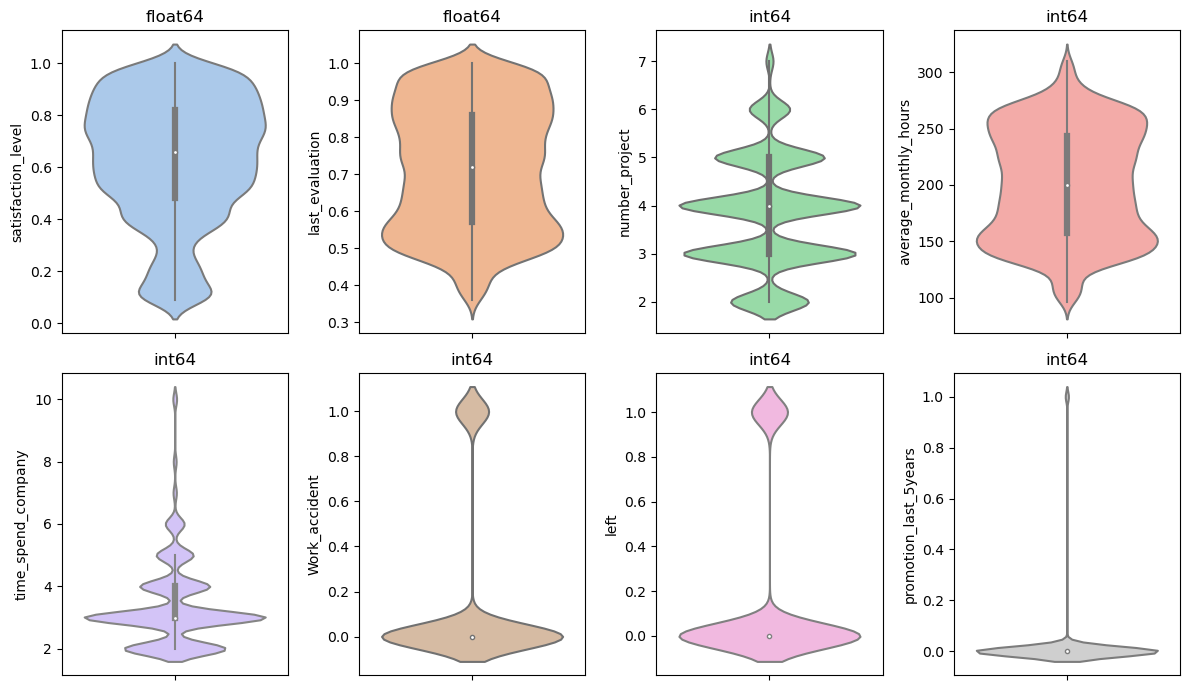

In [20]:
numeric_df = df1.select_dtypes(include=[np.number])
palette = sns.color_palette("pastel",8)
fig, ax = plt.subplots(figsize=(12,7), ncols=4, nrows=2)
i = 0
for row in ax:
    for col in row:
        sns.violinplot(y=numeric_df.iloc[:,i],data=numeric_df,ax=col,color=palette[i])
        col.set_title(str(numeric_df.dtypes[i]))
        i += 1
plt.tight_layout()

We see that all the continuous distributions have a somewhat uniform distribution and the violin plots do a fairly good job at representing the data, however, for the discrete distributions we see that the violin plot does not fully describe them, or at least not so accurately.

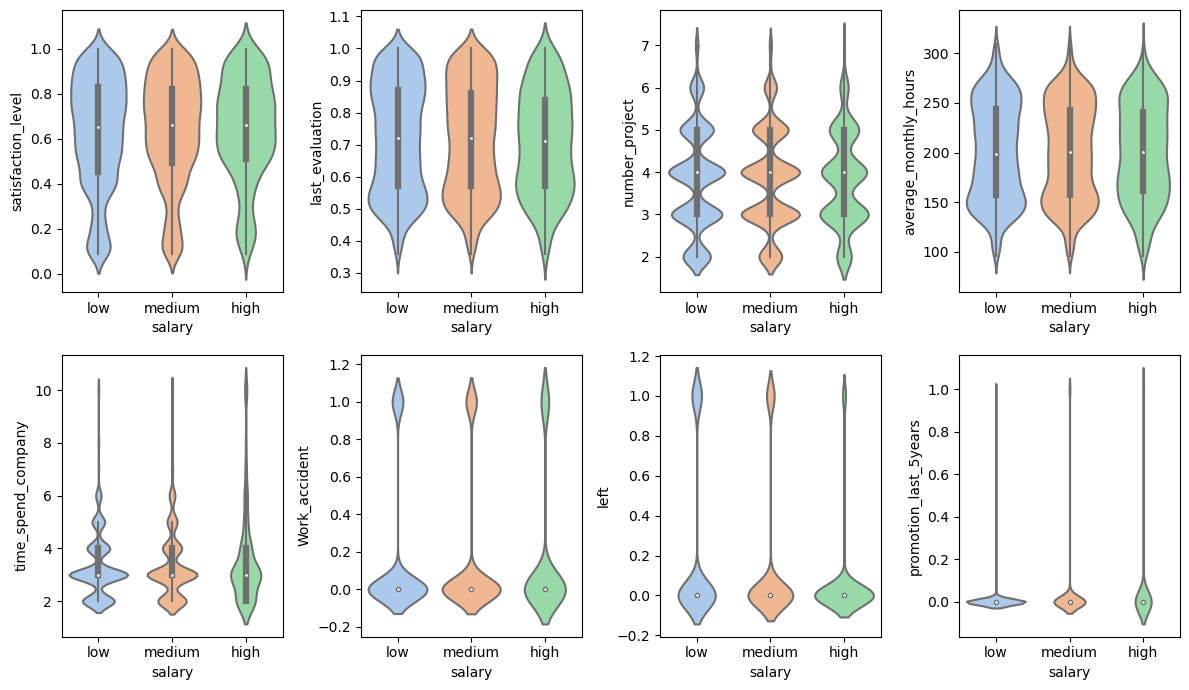

In [21]:
fig, ax = plt.subplots(figsize=(12,7), ncols=4, nrows=2)
i = 0
for row in ax:
    for col in row:
        sns.violinplot(y=df1.columns[i],data=df1,ax=col,x='salary',palette='pastel')
        i += 1
plt.tight_layout()

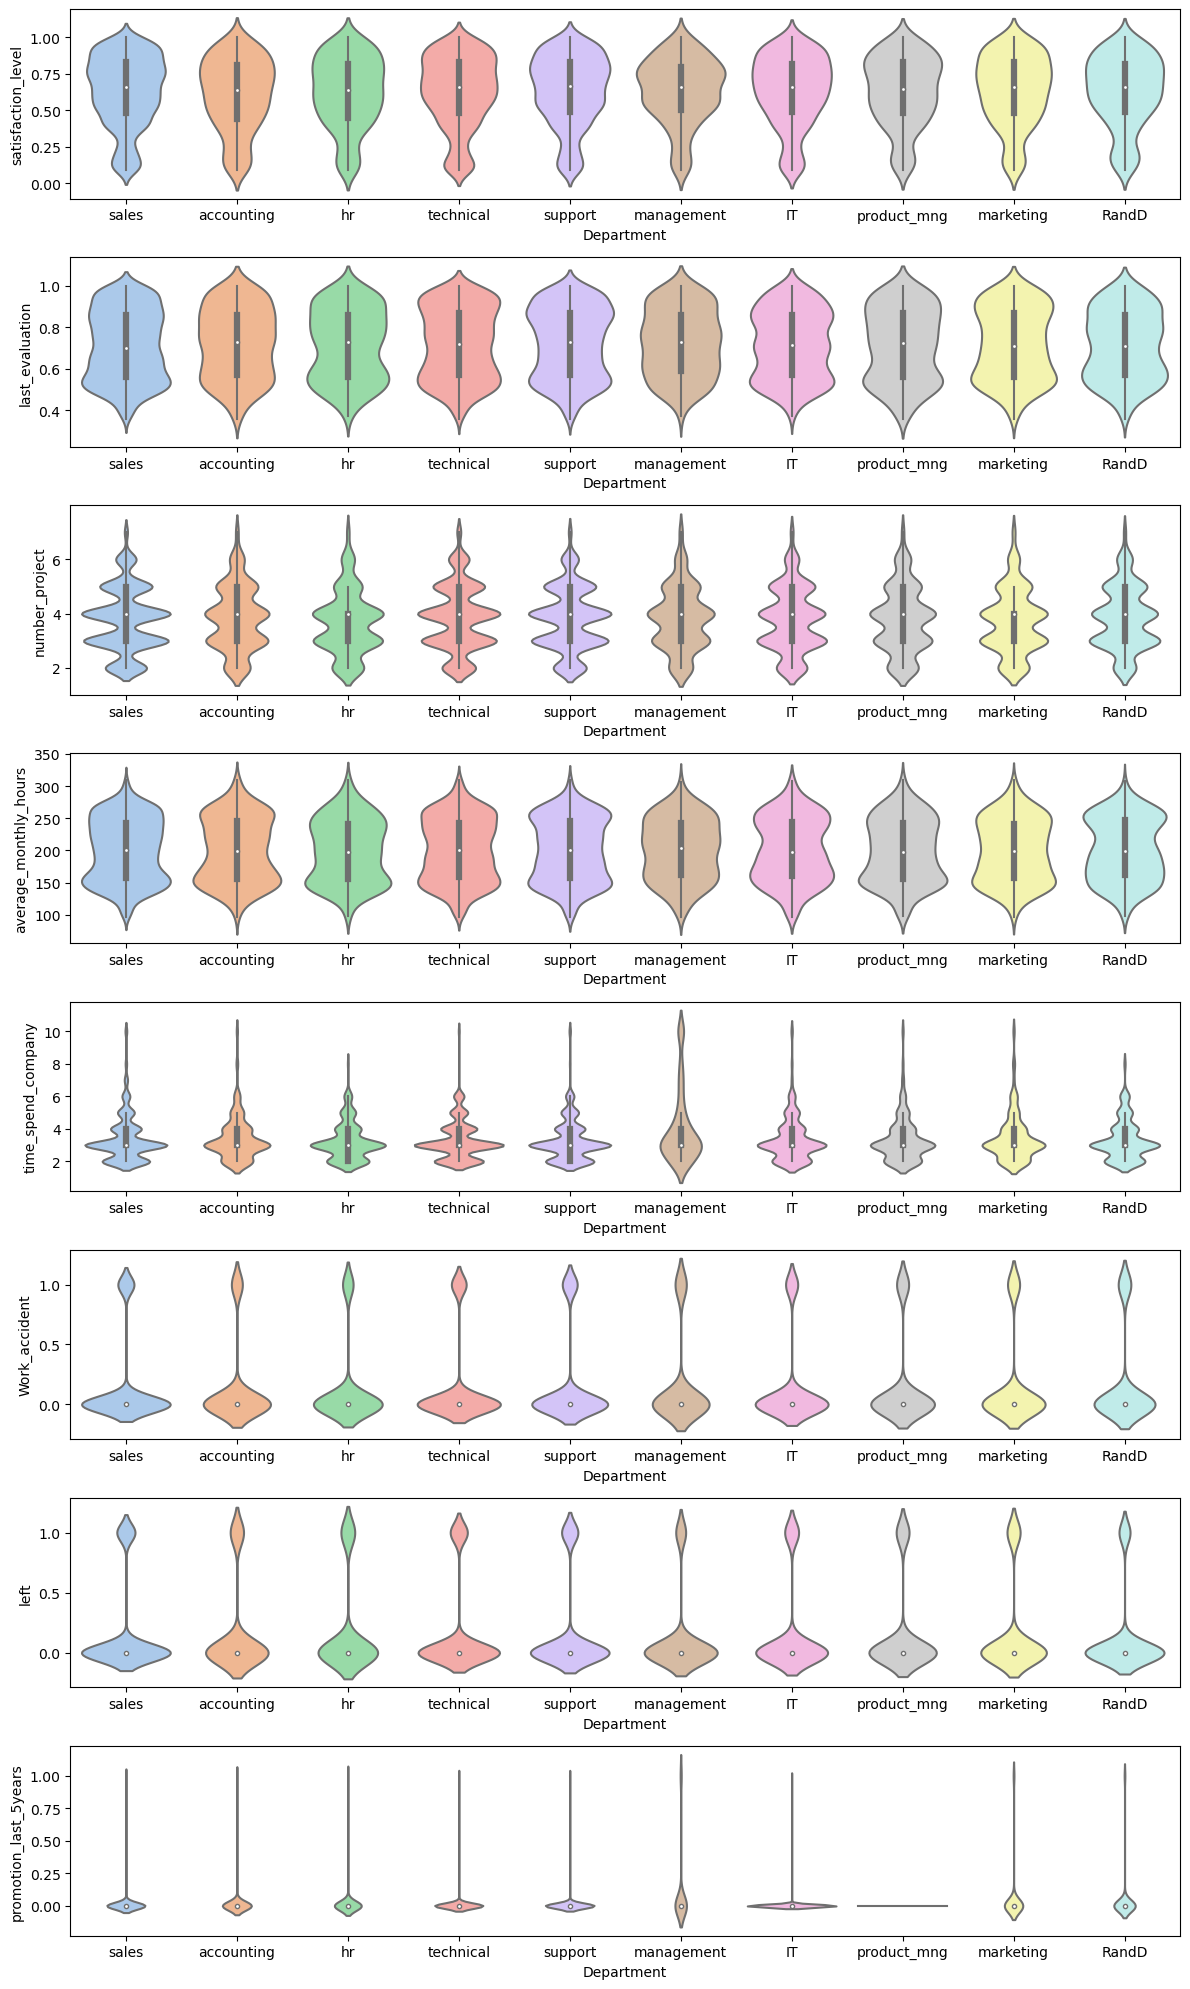

In [22]:
# Same statistic but for different dpt
fig, ax = plt.subplots(figsize=(12,20), ncols=1, nrows=8)
i = 0
for row in ax:
    sns.violinplot(y=df1.columns[i],data=df1,ax=row,x='Department',palette='pastel')
    i += 1
plt.tight_layout()


The distributions of various features across different departments in the company appear relatively consistent. However, an interesting observation is that employees in the product management department have not received any promotions in the past year. Additionally, while the distribution of the 'left' variable appears similar across most departments, there is a notable difference in the management department. Apart from employee tenure, there are no significant outliers observed in the existing features.

Size of SALES: 27.012% 

Size of ACCOUNTING: 5.179% 

Size of HR: 5.012% 

Size of TECHNICAL: 18.714% 

Size of SUPPORT: 15.186% 

Size of MANAGEMENT: 3.636% 

Size of IT: 8.139% 

Size of PRODUCT_MNG: 5.721% 

Size of MARKETING: 5.613% 

Size of RANDD: 5.788% 



In [24]:
#percentage of employees who left the company for each department.


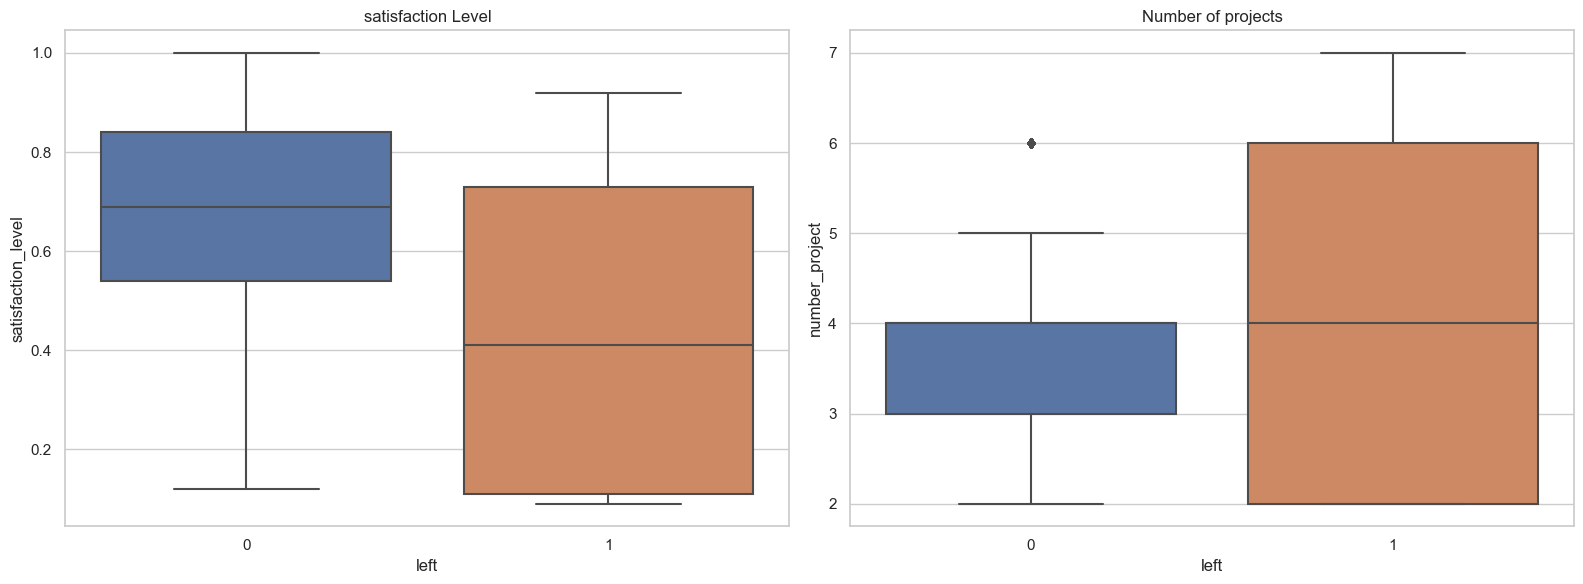

In [25]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid' )

#Create subplots for each variable
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize= (16,6))

#plot satisfaction level
sns.boxplot(x= 'left', y = 'satisfaction_level', data = df1, ax= axes[0])
axes[0].set_title('satisfaction Level')

# Plot number of projects
sns.boxplot(x='left', y= 'number_project', data=df1, ax= axes[1])
axes[1].set_title('Number of projects')

# Adjust layout
plt.tight_layout()

plt.show()


# Observation
Satisfaction Level: The box plot for satisfaction level indicates that employees who left the company tend to have lower satisfaction levels compared to those who stayed. This suggests that lower satisfaction levels may be associated with higher turnover rates.

Number of Projects: The box plot for the number of projects suggests that employees who left the company were assigned to a higher number of projects compared to those who stayed. This could imply that employees who are overloaded with multiple projects may be more likely to leave the company, possibly due to burnout, stress, or dissatisfaction with their workload.

Overall, the combination of lower satisfaction levels and a higher number of projects among employees who left the company indicates potential factors contributing to employee turnover, such as dissatisfaction with workload or job responsibilities.

Lower satisfaction levels and higher numbers of projects for employees who left the company could indicate potential factors contributing to their decision to leave.

Employees who feel less satisfied may be more likely to leave, especially if they are overwhelmed with a high workload.

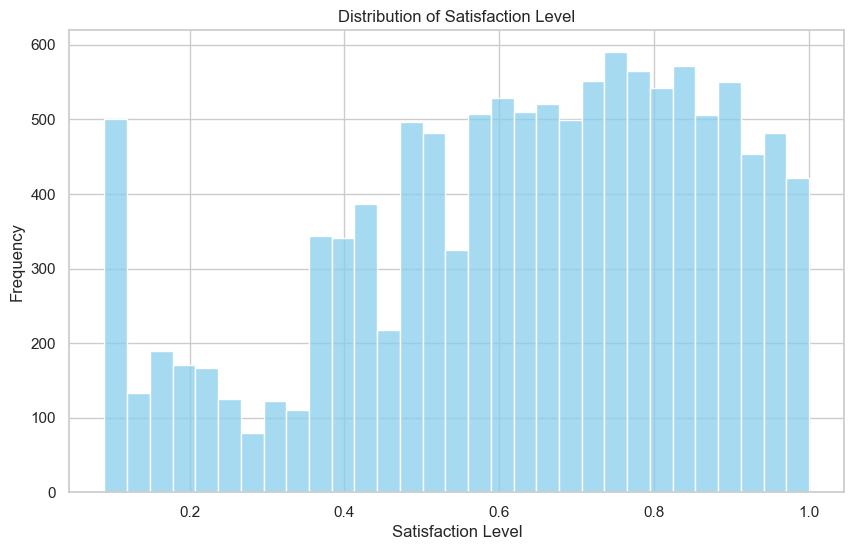

In [26]:
#create a histplot showing the overall satisfaction_level for all employees 
sns.set(style='whitegrid')

plt.figure(figsize= (10,6))
sns.histplot(data=df1, x = 'satisfaction_level',  color='skyblue')
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

It shows that there is a concentration of employees with low satisfaction levels, indicated by the peak around 0.1. On the other hand, there is also a significant number of employees with higher satisfaction levels, as evidenced by the peak around 0.6 to 0.8.

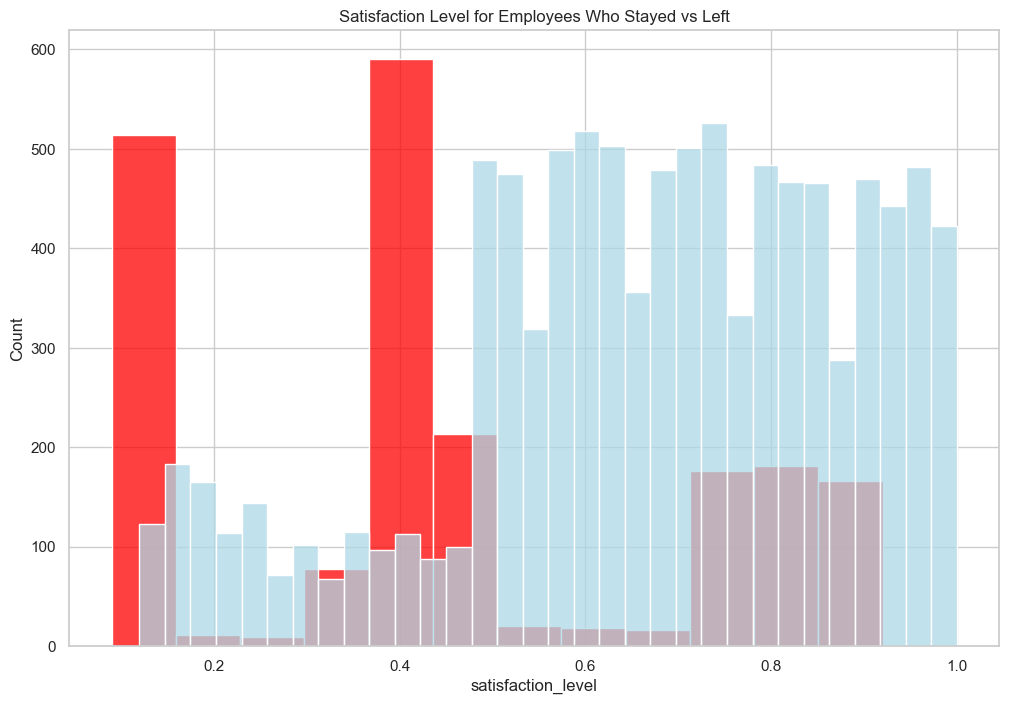

In [27]:
# Separate the dataset based on if the employee was left
df1_left= df1[df1['left']==1]
df1_stayed= df1[df1['left']==0]

plt.figure(figsize=(12,8))

# Plot histogram for employees who left

sns.histplot(data=df1_left, x='satisfaction_level', color= 'red',  label= 'Left')
plt.title('Satisfaction Level for Employees Who Left')

# Plot histogram for employees who stayed
sns.histplot(data= df1_stayed, x= 'satisfaction_level', color= 'lightblue', label="stayed")
plt.title('Satisfaction Level for Employees Who Stayed vs Left')


plt.show()

The lowest satisfaction level scores were more likely given by the employees who have left the company, but we still see numbers of stayed employees given very low satisfaction scores. On the other hand, there are some employees who left the company have gave higher scores of satisfaction.

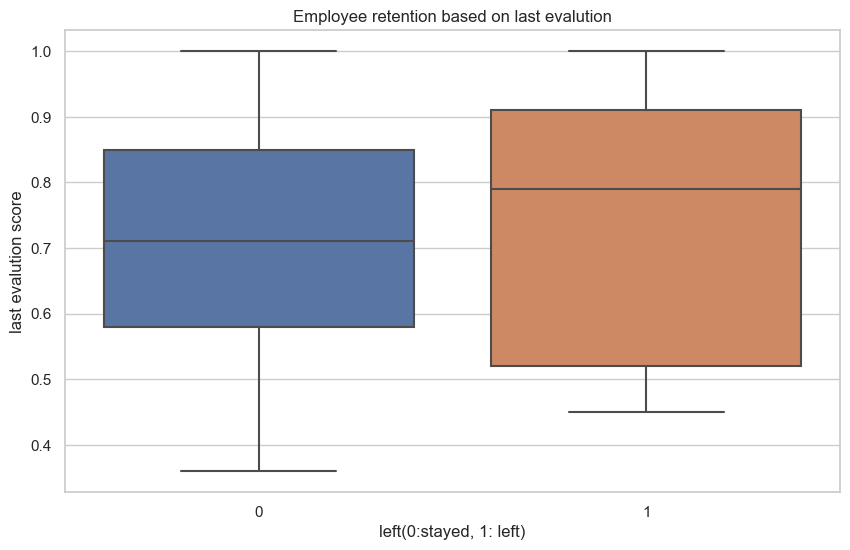

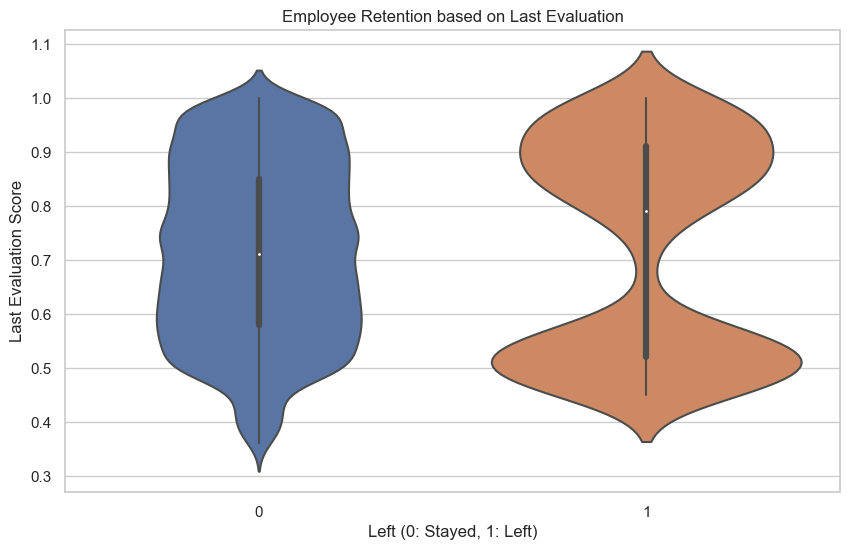

In [28]:
#create a box and violin plot of employee retention based on the last_evaluation.
plt.figure(figsize=(10,6))
sns.boxplot(x= 'left', y='last_evaluation', data=df1 )
plt.title('Employee retention based on last evalution')
plt.xlabel('left(0:stayed, 1: left)')
plt.ylabel('last evalution score')

# Create a violin plot to visualize employee retention based on last evaluation
plt.figure(figsize=(10, 6))
sns.violinplot(x='left', y='last_evaluation', data=df1)
plt.title('Employee Retention based on Last Evaluation')
plt.xlabel('Left (0: Stayed, 1: Left)')
plt.ylabel('Last Evaluation Score')
plt.show()


# Observations
we can observe that the employees who left the company tend to have slightly higher average scores in their last performance evaluations compared to the employees who stayed. This observation suggests that there may not be a direct correlation between high performance evaluations and employee retention.

There could be sevaral reasons:

1. Employee who left may have had higher expactation that were not met in thier current roles, leading to dissatisfaction and ultimately, deprature from the company.

2. high performers may feel undervalued or or unappreciated despite their good performance, leading them to seek opportunity elsewhere.

3. Other factors such as work_life balance, career growth opportunities, or company culture may also influence employee's decision to leave.

Text(0.5, 1.0, 'Distribution of employee by number of projects')

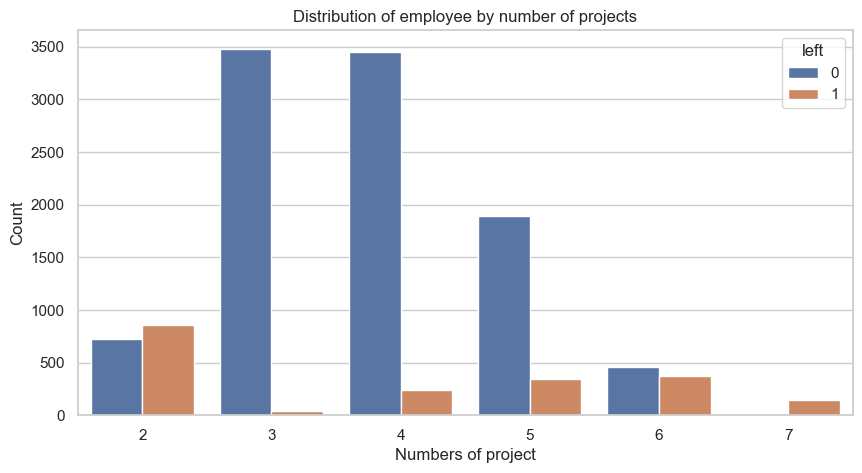

In [29]:
#create a plot based on the number of projects
plt.figure(figsize=(10,5))
sns.countplot(data=df1, x='number_project' , hue='left')
plt.xlabel('Numbers of project')
plt.ylabel('Count')
plt.title('Distribution of employee by number of projects')

We observe intresting pattern regarding turnover.
1. Employee who assigned to only 2 projects shows the highest likelihood of turnover compared to the other project counts. this suggest that employee with lighter workload may feel less engaged leading to higher turn over rates

2. When employees are  assigned to 3 projects, the likelihood of turnover is minimized. This could imply that a moderate workload allows employees to maintain a better work life balance and job satisfaction, reducing the urge to leave the company.

3. As the number of projetcs increases the beyond the 3, the probability of turn over rises steadily. this indicate that as the workload become heavier , employees may experience increased stress or burnout, making them more inclined to seek opportunities elsewhere.

interestingly, all employee who are assigned to 7 projects left the company. this extrean workload may have been overwhelming for employees, leading to their desicion to resign.

Over all this analysis suggest a significant relationship between the number of projects assigned and employee turnover, with moderate workload appearing to be associated with higher employee retention.

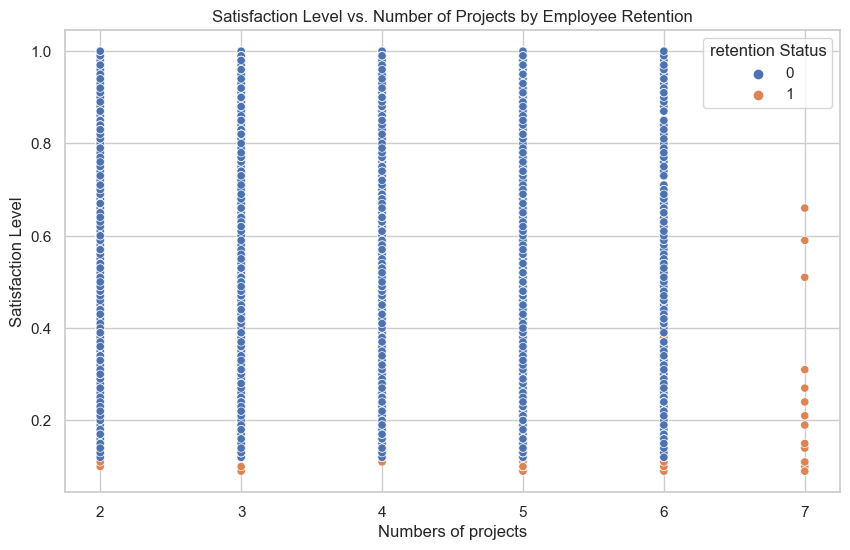

In [30]:
#create a scatter plot to analyze the satisfaction level of employees with their projects and whether they stayed or left.

plt.figure(figsize=(10,6))

sns.scatterplot(data=df1, x= 'number_project', y= 'satisfaction_level', hue='left' )
plt.title('Satisfaction Level vs. Number of Projects by Employee Retention')
plt.xlabel('Numbers of projects')
plt.ylabel('Satisfaction Level')

plt.legend(title='retention Status', loc= 'upper right')
plt.grid(True)

Based on scatter plot and observation of the satisfaction level of employee who left:
    
1. Employees who left the company tend to have lower satisfaction levels.
2. There are intances where employees who left the company had higher satisfaction levels, particularly when they were involved in 7 projects. this observation suggest that there may be other factors contributing to their desicion to leave, such as career advancement opportunities, work-life balance, or organizational culture.
3. The scatterplot also reveals that employees who left were involved in various number of projects. however, there is a notable concentration of point around 3 to 5 projects, indicating that employees with moderate project involvement were more likely to leave.

Conclusion:

While low satisfaction levels are associated with employees turnover, there are exception where employees with higher satisfaction levels still choose to leave, possibly due to other underlying reasons.




([<matplotlib.axis.XTick at 0x194c6075590>,
 [Text(0, 0, 'Stayed'), Text(1, 0, 'Left')])

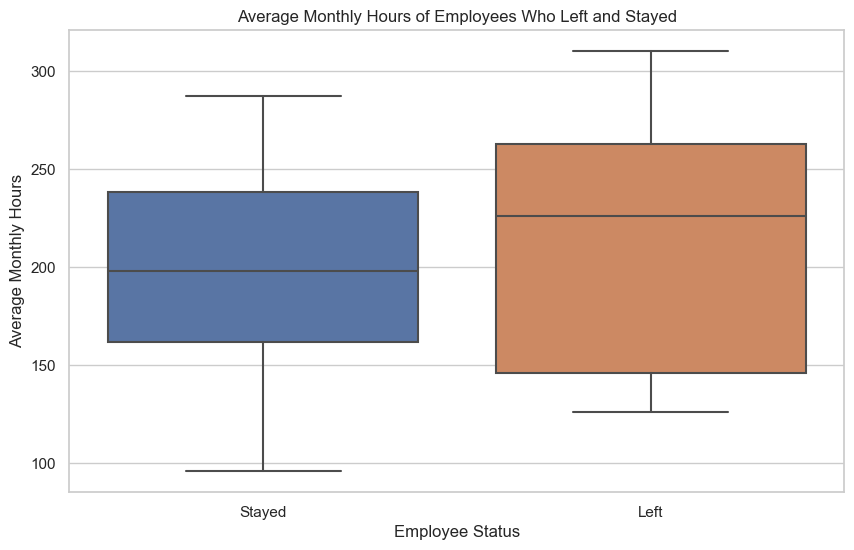

In [31]:
#Creating a boxplot of average monthly hours for employees who left the company 
plt.figure(figsize=(10,6))
sns.boxplot(data=df1, x='left', y='average_monthly_hours')
plt.title('Average Monthly Hours of Employees Who Left and Stayed')
plt.xlabel('Employee Status')
plt.ylabel('Average Monthly Hours')
plt.xticks([0, 1], ['Stayed', 'Left'])

In [32]:
#standard deviation and range in the average monthly work hours for employees who left compared to those who stayed

# Separate the dataset based on if the employee left or stayed
left_emp= df1[df1['left']==1]
stayed_emp=df1[df1['left']==0]

# Calculate the mode for average monthly work hours
left_mode = left_emp['average_monthly_hours'].mode()
print("Mode of Average Monthly Work Hours for Employees Who left:",left_mode)

stayed_mode = stayed_emp['average_monthly_hours'].mode()
print("Mode of Average Monthly Work Hours for Employees Who stayed:",stayed_mode)


# Calculate the standard deviation and range for average monthly work hours
std_left= left_emp['average_monthly_hours'].std()
print("Standard deviation of average monthly work hours for employees who left:", std_left)

range_left=left_emp['average_monthly_hours'].max()-left_emp['average_monthly_hours'].min()
print("Range of average monthly work hours for employees who left:", range_left)

std_stayed=stayed_emp['average_monthly_hours'].std()
print("Standard deviation of average monthly work hours for employees who stayed:",std_stayed)

range_stayed= stayed_emp['average_monthly_hours'].max()-stayed_emp['average_monthly_hours'].min()
print("Range of average monthly work hours for employees who stayed:", range_stayed)




Mode of Average Monthly Work Hours for Employees Who left: 0    156
Name: average_monthly_hours, dtype: int64
Mode of Average Monthly Work Hours for Employees Who stayed: 0    224
Name: average_monthly_hours, dtype: int64
Standard deviation of average monthly work hours for employees who left: 61.29514478095234
Range of average monthly work hours for employees who left: 184
Standard deviation of average monthly work hours for employees who stayed: 45.66550722991116
Range of average monthly work hours for employees who stayed: 191


This information tells us several things:

Variability in Work Hours: Employees who left the company had a higher variability in their average monthly work hours compared to those who stayed. This means that among employees who left, there was a wider range of work hours, with some working significantly more or fewer hours than others.

Potential Workload Issues: The higher variability in work hours among employees who left may indicate potential issues with workload management or work-life balance within the company. Employees who consistently work long hours or have irregular work schedules may be more likely to experience burnout or dissatisfaction, leading to turnover.


Retention Strategies: Understanding the distribution of work hours among employees who stayed versus those who left can inform retention strategies. For example, if employees who left consistently worked longer hours, implementing measures to improve workload distribution, promote work-life balance, or address factors contributing to overtime may help retain employees.


Benchmarking: Comparing the standard deviation and range of work hours between employees who stayed and those who left can serve as benchmarks for evaluating future workforce dynamics. Monitoring changes in these metrics over time can provide insights into the effectiveness of retention efforts or changes in work practices.






# Consider a fair amount of monthly hours to be 170
we can calculate the percentage of employees who fall within this range.

In [33]:
# Define the fair amount of monthly hours
fair_hour = 170 

# Filter employees with fair monthly hours
unfair_hour_employees = df1[df1['average_monthly_hours']>(fair_hour)]
print(f"Percentage of employees who worked above average monthly hours of 170:{len(unfair_hour_employees['average_monthly_hours'])/len(df1['average_monthly_hours'])*100}%")

#calculate the percentage of employees who left the company who's monthly average work hour over is 170
left= df1[df1['left']==1]
stayed=df1[df1['left']==0]

# Filter employees with fair monthly hours
unfair_hour_left_employee = left[left['average_monthly_hours']>fair_hour]
percentage_unfair_hour= len(unfair_hour_left_employee['average_monthly_hours'])/len(df1['average_monthly_hours'])*100
print("Percentage of employees who left and worked above the fair amount of monthly hours of 170:",percentage_unfair_hour,"%")

#calculate saprate number of employees who worked above the fair amount of monthly hours of 170
print("The number of employee who worked over 170 hours/month in both of classes:\n", unfair_hour_employees['left'].value_counts())

Percentage of employees who worked above average monthly hours of 170:66.53323325827704%
Percentage of employees who left and worked above the fair amount of monthly hours of 170: 9.206905178884163 %
The number of employee who worked over 170 hours/month in both of classes:
 left
0    6874
1    1104
Name: count, dtype: int64


In [34]:
#the stats of satisfaction level of employees who work over 170 hours
unfair_hour_employees['satisfaction_level'].describe()

count    7978.000000
mean        0.644174
std         0.250255
min         0.090000
25%         0.520000
50%         0.690000
75%         0.840000
max         1.000000
Name: satisfaction_level, dtype: float64

# Interpretation
The average satisfaction level among these employees is approximately 0.644, suggesting a moderate level of satisfaction on average.

The standard deviation of 0.250 indicates a considrable variability in satisfaction levels within this group. Some employees may have higher or lower satisfaction levels compared to the average.

The distribution of satisfaction levels appears to be positively skewed, with a minimum satisfaction level of 0.090 and a maximum of 1.000. This suggests that while most employees may have moderate to high satisfaction levels, there are some outliers with notably low or high satisfaction.

The quartile values provide additional context. For example, the 25th percentile (Q1) indicates that 25% of employees have a satisfaction level below 0.520, while the 75th percentile (Q3) suggests that 75% of employees have a satisfaction level below 0.840.

these statistics indicate that employees working over 170 hours per month generally have moderate satisfaction levels, but there is notable variability in individual experiences, with some employees reporting significantly lower or higher satisfaction levels.

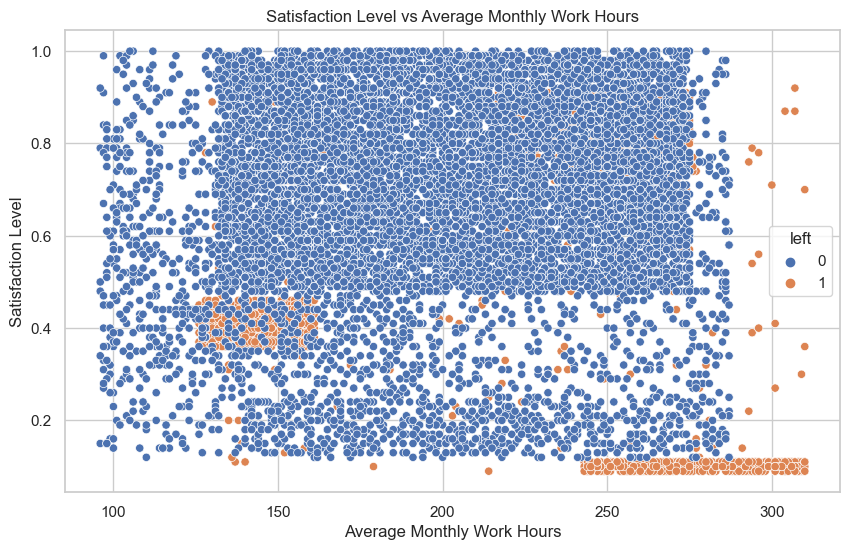

In [35]:
# Create a scatter plot of average monthly hours vs satisfaction level to get better understanding.

plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left')
plt.xlabel('Average Monthly Work Hours')
plt.ylabel('Satisfaction Level')
plt.title('Satisfaction Level vs Average Monthly Work Hours')
plt.grid(True)

There is a cluster of employees who work between 250 and 300 hours per month, and they tend to have very low satisfaction scores. This suggests that working long hours without adequate breaks or support may lead to decreased job satisfaction.

Another group of employees works approximately 130 to 170 hours per month, and they also exhibit lower satisfaction levels compared to the overall average. This could indicate that workload or job demands within this range are contributing to dissatisfaction among employees.

Overall, the scatterplot highlights the importance of considering both work hours and satisfaction levels in understanding employee turnover. It suggests potential areas where interventions or adjustments could be made to improve job satisfaction and potentially reduce turnover rates.

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


([<matplotlib.axis.XTick at 0x194c7cba7d0>,
 [Text(0, 0, 'Stayed'), Text(1, 0, 'Left')])

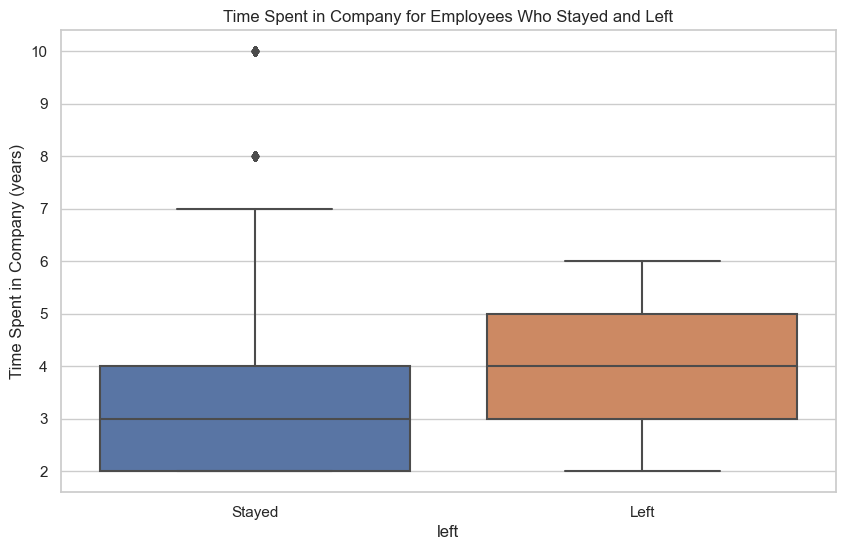

In [37]:
#create boxplot of who stay and leave based on time spend in the company
plt.figure(figsize=(10,6))
sns.boxplot(data=df1, x='left', y='time_spend_company')
plt.title('Time Spent in Company for Employees Who Stayed and Left')
plt.xlabel('left')
plt.ylabel('Time Spent in Company (years)')
plt.xticks([0,1], ['Stayed', 'Left'])

# Observation
The boxplot indicates that employees who spent more time in the company have a higher likelihood of leaving, as evidenced by the higher median and upper quartile values for employees who left compared to those who stayed. This suggests that there may be factors related to long-term employment that contribute to employee turnover

# Lets see the column of ['Work_accident'] has any impact on employees who lef or stayed

Text(0, 0.5, 'Counts')

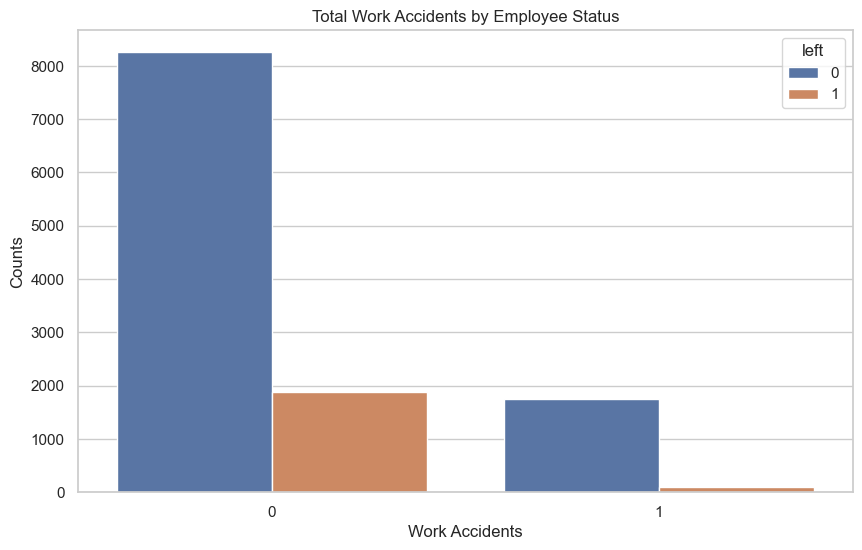

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='Work_accident', hue='left')
plt.title('Total Work Accidents by Employee Status')
plt.xlabel('Work Accidents')
plt.ylabel('Counts')

# Now check numbers of left and stayed employees who promoted in last 5 years 

In [39]:
print("Numbers of employees who promoted and Stayed: ", df1[(df1['left']==0) & (df1['promotion_last_5years']==1)].shape[0])
print(f"Percentage of employees who promoted and Stayed: {(195/len(df1))*100 :.2f}%")
print("Numbers of employees who promoted and left: ", df1[(df1['left']==1) & (df1['promotion_last_5years']==0)].shape[0])

Numbers of employees who promoted and Stayed:  195
Percentage of employees who promoted and Stayed: 1.63%
Numbers of employees who promoted and left:  1983


In [40]:
#calculate promoted and non_promoted employees 
promoted=df1[df1['promotion_last_5years']==1]
nonpromoted=df1[df1['promotion_last_5years']==0]
print('Numbers of promoted employees: ', len(promoted))
print("Numbers of non promoted employees: ", len(nonpromoted))

#calculate promoted and non_promoted employees besed on stayed and left
#promoted stayed and left
left_prom= promoted[promoted['left']==1]
stayed_prom=promoted[promoted['left']==0]
print('Numbers of promoted employees who left: ', len(left_prom))
print('Numbers of promoted employees who stayed: ', len(stayed_prom))

#non promoted stayed and left
left_non_prom= nonpromoted[nonpromoted['left']==1]
stayed_non_prom=nonpromoted[nonpromoted['left']==0]
print('Numbers of non promoted employees who left: ', len(left_non_prom))
print('Numbers of non promoted employees who stayed: ', len(stayed_non_prom))

Numbers of promoted employees:  203
Numbers of non promoted employees:  11788
Numbers of promoted employees who left:  8
Numbers of promoted employees who stayed:  195
Numbers of non promoted employees who left:  1983
Numbers of non promoted employees who stayed:  9805


we can analyze the trend of employee retention based on promotion status:

**Promoted Employees:

Out of 203 promoted employees, 8 left the company, indicating a turnover rate of approximately 3.94%.
The majority of promoted employees, 195 out of 203, chose to stay, resulting in a retention rate of approximately 96.06%.

**Non-Promoted Employees:

Out of 11788 non-promoted employees, 1983 left the company, indicating a turnover rate of approximately 16.81%.
The majority of non-promoted employees, 9805 out of 11788, chose to stay, resulting in a retention rate of approximately 83.19%.

**Analysis:

Promoted employees have a significantly higher retention rate (96.06%) compared to non-promoted employees (83.19%).

Non-promoted employees have a notably higher turnover rate (16.81%) compared to promoted employees (3.94%).

This suggests that promotion could be a factor influencing employee retention, with a higher likelihood of promoted employees choosing to stay with the company.

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


#  Analyzing of employees retention based on department

Text(0, 0.5, 'Count')

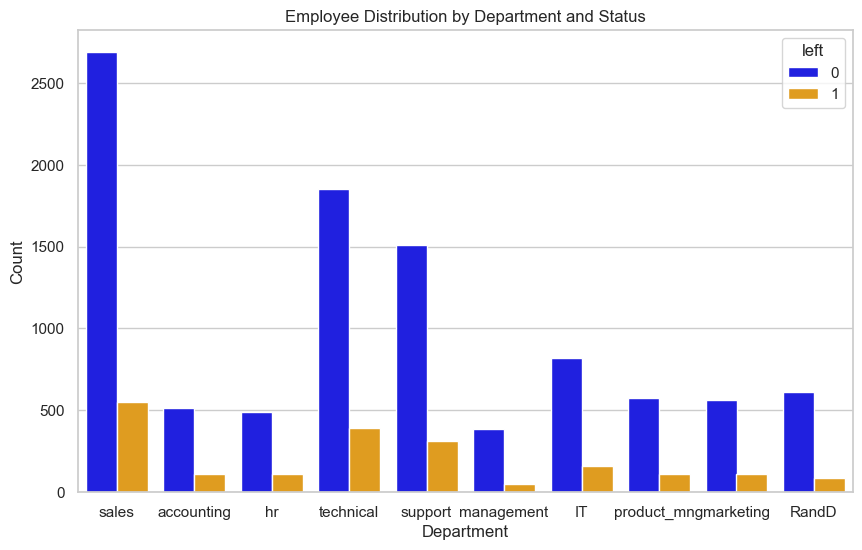

In [42]:
#plot a graph
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='Department', hue='left', palette=['blue', 'orange'])
plt.title('Employee Distribution by Department and Status')
plt.xlabel('Department')
plt.ylabel('Count')


In [88]:
# Check for percentage or numbers of each department's size

#Create empty list to store the percentages and numbers of employees for each department.
size_per = []
size_num = []

# Create loop for Iterates over each unique department in the 'Department' column.
for dpt in df1['Department'].unique():
    num= df1['Department'].value_counts()[dpt]
    per = round(df1['Department'].value_counts()[dpt] / df1.shape[0] * 100, 2)
    size_per.append(per)
    size_num.append(num)
    print(f"size of  {dpt.upper()}: {per}% or {num} \n")  

size of  SALES: 27.01% or 3239 

size of  ACCOUNTING: 5.18% or 621 

size of  HR: 5.01% or 601 

size of  TECHNICAL: 18.71% or 2244 

size of  SUPPORT: 15.19% or 1821 

size of  MANAGEMENT: 3.64% or 436 

size of  IT: 8.14% or 976 

size of  PRODUCT_MNG: 5.72% or 686 

size of  MARKETING: 5.61% or 673 

size of  RANDD: 5.79% or 694 



In [82]:
# Check if these same class balances are seen in the the employees who left

#Create empty list to store the percentages and numbers of employees who left for each department.
left_per = []
left_num = []

for dpt in df1['Department'].unique():
    print(dpt.upper())
    num=df1.groupby(['Department'])['left'].sum()[dpt]
    per = round(df1.groupby(['Department'])['left'].sum()[dpt]/df1.groupby(['Department'])['left'].sum().sum(),4)*100
    left_per.append(per)
    left_num.append(num)
    print(f"left_Size: {per:.2f}% or {num}\n")
    

SALES
left_Size: 27.62% or 550

ACCOUNTING
left_Size: 5.47% or 109

HR
left_Size: 5.68% or 113

TECHNICAL
left_Size: 19.59% or 390

SUPPORT
left_Size: 15.67% or 312

MANAGEMENT
left_Size: 2.61% or 52

IT
left_Size: 7.94% or 158

PRODUCT_MNG
left_Size: 5.52% or 110

MARKETING
left_Size: 5.63% or 112

RANDD
left_Size: 4.27% or 85



In [92]:
size_table1 = pd.DataFrame({"Department":df1['Department'].unique(), "Dpt. Size (%)": size_per,
                           "Dpt. Left Size (%)":left_per, "Dpt (Size - Left)%":np.array(size_per)-np.array(left_per)})


In [106]:
#Create table of dpt size and dpt.left size 
size_table= pd.DataFrame({"Department": df1['Department'].unique(), 'dpt_size(123)': size_num, "dpt_left_size(123)": left_num,
                           "dpt(size-left(123))": np.array(size_num) - np.array(left_num), "dpt_size(%)": size_per,
                          "dept(size_left(%)": left_per, "dpt((size-left(%))": np.array(size_per)-np.array(left_per) })

In [107]:
size_table


,Department,dpt_size(123),dpt_left_size(123),dpt(size-left(123)),dpt_size(%),dept(size_left(%),dpt((size-left(%))
0,sales,3239,550,2689,27.01,27.62,-0.61
1,accounting,621,109,512,5.18,5.47,-0.29
2,hr,601,113,488,5.01,5.68,-0.67
3,technical,2244,390,1854,18.71,19.59,-0.88
4,support,1821,312,1509,15.19,15.67,-0.48
5,management,436,52,384,3.64,2.61,1.03
6,IT,976,158,818,8.14,7.94,0.20
7,product_mng,686,110,576,5.72,5.52,0.20
8,marketing,673,112,561,5.61,5.63,-0.02
9,RandD,694,85,609,5.79,4.27,1.52


# Interpreting
For the Sales department, there are 3239 employees in total, out of which 550 left the company. This results in a difference of 2689 employees who did not leave. The percentage of total employees in the Sales department is 27.01%, and the percentage of employees who left is 27.62%. The difference between these percentages is -0.61%, indicating a slightly higher proportion of employees left compared to the overall departmental proportion.


If right-most column is negative then the dpt is losing more employees after normalizing by that dpt size. Which could suggest that the dpt higher employee lefts percentages than other smaller dpts. So we see that the sales dpt is losing the most employees even after we account for the dpts size. We also notice that RandD has the fewes losses after accounting all the dpt sizes.

Total Numbers of employees in each Department
IT              976
RandD           694
accounting      621
hr              601
management      436
marketing       673
product_mng     686
sales          3239
support        1821
technical      2244
Name: count, dtype: int64

Percentage of employees who left the company in each Department
IT             16.19
RandD          12.25
accounting     17.55
hr             18.80
management     11.93
marketing      16.64
product_mng    16.03
sales          16.98
support        17.13
technical      17.38
Name: count, dtype: float64


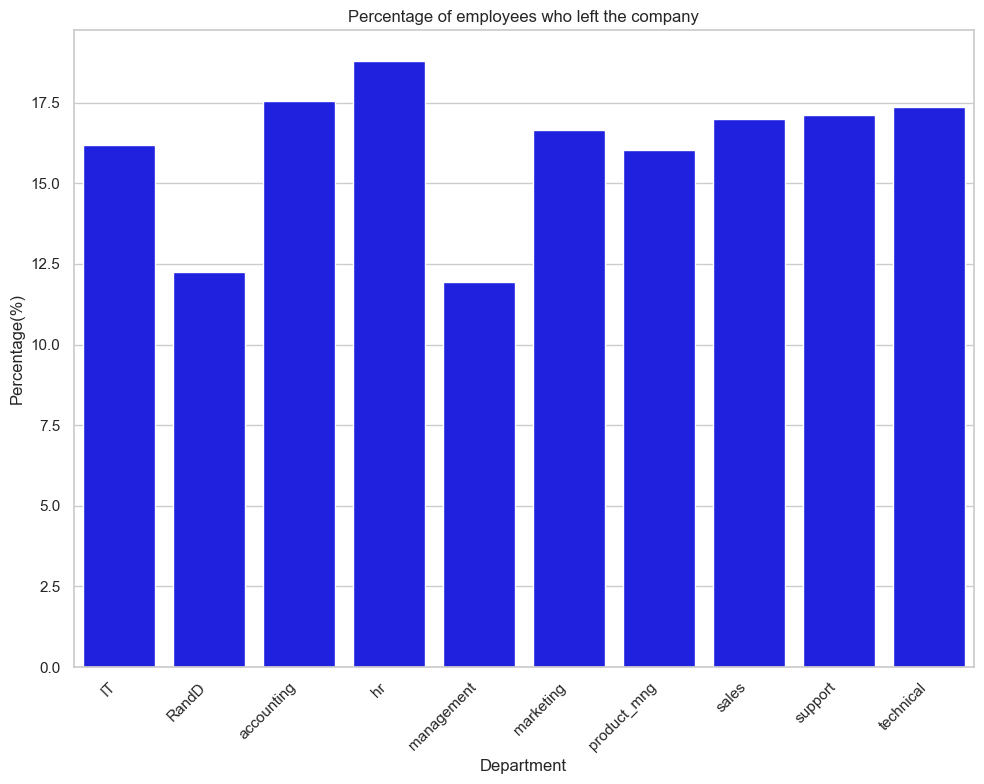

In [52]:
#calculate percentage of employees who left by each department

#calculate numbers of employees as need
total_emp_by_dep=df1['Department'].value_counts().sort_index()
left_emp_by_dep= df1[df1['left']==1]["Department"].value_counts().sort_index()
stayed_emp_by_dep= (total_emp_by_dep-left_emp_by_dep).sort_index()

print("Total Numbers of employees in each", total_emp_by_dep)

# calculating percentage of employees who left
per_emp_left= (left_emp_by_dep/total_emp_by_dep*100).round(2).sort_index()
print("\nPercentage of employees who left the company in each",per_emp_left)

#Create visualization
plt.figure(figsize=(10,8))
sns.barplot(x=per_emp_left.index, y= per_emp_left.values, color='blue')
plt.title('Percentage of employees who left the company')
plt.xlabel('Department')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Interpretation:
1. The HR department has a relatively high turnover rate compare to others department, despite having fewer total employees. this could indicate potential issues within the HR that need to be addressed to improve retantion.

2. While the IT department has a moderate turnover rate (16.19%), it has a relatively small number of employees compared to departments like sales and technical. This suggests that even a moderate turnover rate in the IT department could have a significant impact on the company's overall workforce.

3. Departments like management and R&D have lower turnover rates

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


# Employee retention based on the salary (level).

Numbers of 'Low_salary' employees who left: 1174 and percantage is: 20.45%
Number of 'Medium_salary' employees who left: 769 and percentage is: 14.62%
Number of 'High_salary' employees who left: 48 and percentage is: 4.85%


Text(0, 0.5, 'Counts')

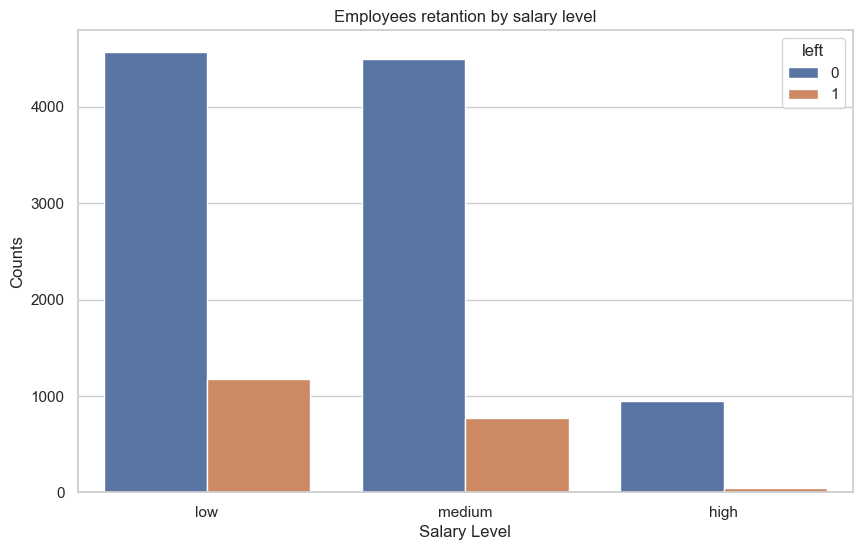

In [45]:
#Calculating numbers and percentage of emplyees who left
left_low_sal= df1[(df1['salary']=='low') & (df1['left']==1)]
left_medium_sal=df1[(df1['salary']=='medium') & (df1['left']==1)]
left_high_sal=df1[(df1['salary']=='high') & (df1['left']==1)]
print(f"Numbers of 'Low_salary' employees who left: {((left_low_sal).shape[0])} and percantage is: {(left_low_sal).shape[0]/len(df1[df1['salary']=='low'])*100:.2f}%")
print(f"Number of 'Medium_salary' employees who left: {(left_medium_sal).shape[0]} and percentage is: {(left_medium_sal).shape[0]/len(df1[df1['salary']=='medium'])*100:.2f}%")
print(f"Number of 'High_salary' employees who left: {((left_high_sal).shape[0])} and percentage is: {(left_high_sal).shape[0]/ len(df1[df1['salary']=='high'])*100:.2f}%")

#creating visualization
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='salary', hue='left')
plt.title('Employees retantion by salary level')
plt.xlabel('Salary Level')
plt.ylabel('Counts')

# Interpretaion
A considerable portion of employees with lower salaries were more likely to leave compared to other salary groups.

Although this percentage is lower than for low-salary employees, it still indicates a significant proportion of turnover among this group.

This suggests that employees with higher salaries had the lowest turnover rate compared to those with lower salaries.

There appears to be a trend where higher salaries are associated with lower turnover rates, indicating that compensation may play a role in employee retention. However, further analysis would be needed to explore other potential factors influencing turnover across different salary levels.

In [46]:
numeric_df = df1.select_dtypes(include=['number'])
corr_metrix= numeric_df.corr()
corr_metrix

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


<Axes: >

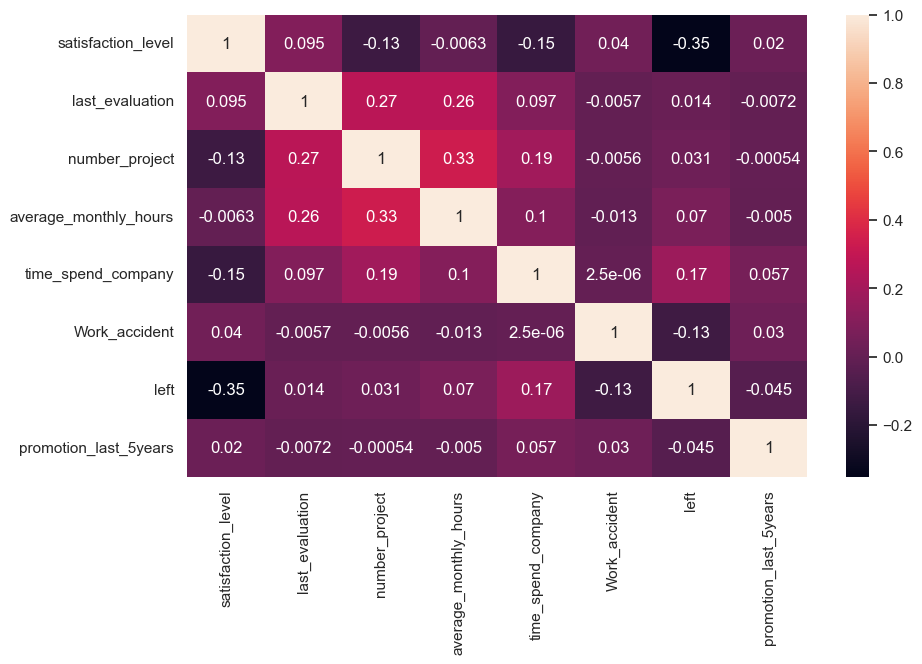

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_metrix, annot= True)

# Observation
The heatmap shows a darker color indicating a stronger correlation between satisfaction level and the 'left' variable compared to other variable pairs. This suggests that satisfaction level has a stronger relationship with whether an employee leaves the company or not compared to other variables in the dataset. A negative correlation indicates that as satisfaction level decreases, the likelihood of an employee leaving increases.



# Insights
We identified that the turnover rate in the company is around 16.8%, Indicating a significant proportion of employees is leaving.

Our analysis revealed that the two most correlated variables in our dataset are the number of projects and average monthly hours worked. Conversely, the strongest inverse correlation exists between the satisfaction level and the likelihood of an employee leaving the company. These correlations align with expectations and offer insights that are intuitive and logical.

Employees who left the company tended to be lower satisfaction levels and involved in more projects, possibly indicating issues such as insufficient training, overwhelming workload, or lack of support.

The employees who worked for 7 projects were all left.
All employees involved in 7 projects and were working under 5 years left the company.This observation suggests the need to investigate whether workload distribution is equitable among employees.

Employees with 3-5 years of tenure were more likely to leave when required to work overtime, suggesting potential dissatisfaction with workload or work-life balance during this tenure period.
Employees who have been with the company for over six years exhibit a higher likelihood of retention.



Our analysis uncovered that, when normalized by the number of lost employees per department, the sales department comprises the highest percentage of low-income workers within the company.
Likewise, our findings indicate that the management department exhibits the highest percentage of high-income workers among all departments within the company.

We also observed that there is little variation in the distribution of these metrics when considering salary levels. However, we did notice a significant difference in employee retention rates based on income levels. It appears that higher-income employees tend to stay with the company more frequently compared to medium and low-income employees, which aligns with our expectations.


Furthermore, our analysis revealed that the sales department exhibits the highest percentage of employee turnover when adjusted for department size. This finding suggests a potential issue within the sales department that warrants further investigation.